In [2]:
%matplotlib notebook

In [3]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [4]:
# Read in data
data = pd.read_csv("All_wells_final.csv")
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data = data.fillna(0)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7878 entries, 0 to 7877
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   7878 non-null   object 
 1   WELL_BORE_CODE            7878 non-null   object 
 2   AVG_DOWNHOLE_PRESSURE     7878 non-null   float64
 3   AVG_DOWNHOLE_TEMPERATURE  7878 non-null   float64
 4   AVG_DP_TUBING             7878 non-null   float64
 5   AVG_CHOKE_SIZE_P          7878 non-null   float64
 6   AVG_WHP_P                 7878 non-null   float64
 7   AVG_WHT_P                 7878 non-null   float64
 8   DP_CHOKE_SIZE             7878 non-null   float64
 9   BORE_OIL_VOL              7878 non-null   float64
 10  BORE_GAS_VOL              7878 non-null   float64
 11  BORE_WAT_VOL              7878 non-null   float64
 12  YEAR                      7878 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 800.2+ KB


In [5]:
data.WELL_BORE_CODE.unique()

array(['NO 15/9-F-1 C', 'NO 15/9-F-11 H', 'NO 15/9-F-12 H',
       'NO 15/9-F-14 H', 'NO 15/9-F-15 D'], dtype=object)

In [8]:
dummy =data.loc[data['AVG_DOWNHOLE_PRESSURE'] > 0]
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5940 entries, 0 to 7877
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   5940 non-null   object 
 1   WELL_BORE_CODE            5940 non-null   object 
 2   AVG_DOWNHOLE_PRESSURE     5940 non-null   float64
 3   AVG_DOWNHOLE_TEMPERATURE  5940 non-null   float64
 4   AVG_DP_TUBING             5940 non-null   float64
 5   AVG_CHOKE_SIZE_P          5940 non-null   float64
 6   AVG_WHP_P                 5940 non-null   float64
 7   AVG_WHT_P                 5940 non-null   float64
 8   DP_CHOKE_SIZE             5940 non-null   float64
 9   BORE_OIL_VOL              5940 non-null   float64
 10  BORE_GAS_VOL              5940 non-null   float64
 11  BORE_WAT_VOL              5940 non-null   float64
 12  YEAR                      5940 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 649.7+ KB


Based on the geological position of the wells we divide the data into 2 clusters:
    1.'NO 15/9-F-14 H' and 'NO 15/9-F-12 H' : Crest Wells
    2. 'NO 15/9-F-1 C', 'NO 15/9-F-11 H', and 'NO 15/9-F-15 D' : Flank Wells
We would now prove through T-testing that the mean outputs of one cluster is significantly different than the other
and hence they have been classified separately. 

In [47]:
well_dictionary ={'NO 15/9-F-1 C': 'Flank', 'NO 15/9-F-11 H':'Flank', 'NO 15/9-F-12 H':'Crest',
                  'NO 15/9-F-14 H':'Crest', 'NO 15/9-F-15 D':'Flank'} 
  
# Add a new column named 'WELL_POS' 
data['WELL_POS'] = data['WELL_BORE_CODE'].map(well_dictionary) 
data.head()

,DATEPRD,WELL_BORE_CODE,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,YEAR,WELL_POS
0,22-Apr-14,NO 15/9-F-1 C,289.421,106.353,182.059,43.34345,107.362,37.939,78.935,631.0,90439.0,0.0,2014,Flank
1,23-Apr-14,NO 15/9-F-1 C,270.240,107.644,171.053,47.16752,99.187,60.757,70.627,1166.0,165720.0,0.0,2014,Flank
2,24-Apr-14,NO 15/9-F-1 C,262.843,107.869,168.242,47.73231,94.601,63.047,66.049,1550.0,221707.0,0.0,2014,Flank
3,25-Apr-14,NO 15/9-F-1 C,255.527,107.971,165.539,48.53377,89.988,64.547,61.405,1249.0,178064.0,0.0,2014,Flank
4,26-Apr-14,NO 15/9-F-1 C,247.199,108.052,162.422,49.84450,84.777,65.724,56.148,1346.0,192602.0,0.0,2014,Flank


In [48]:
#To check the well_position values, if assigned correctly
data.loc[data['WELL_BORE_CODE'] == 'NO 15/9-F-15 D']['WELL_POS'].unique()


array(['Flank'], dtype=object)

In [49]:
#Create a new column with the Gas to Oil Ratio
data['GOR']=data['BORE_GAS_VOL']/data['BORE_OIL_VOL']
data['WOR']=data['BORE_WAT_VOL']/data['BORE_OIL_VOL']

In [50]:
#Get the GOR for the individual clusters
#Creating two dataframes for crest and flank wells

df_crest=data.loc[data['WELL_POS']=='Crest']
df_flank=data.loc[data['WELL_POS']=='Flank']

df_crest.head()

,DATEPRD,WELL_BORE_CODE,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,YEAR,WELL_POS,GOR,WOR
1553,12-Feb-08,NO 15/9-F-12 H,308.056,104.418,201.250,14.48443,106.806,16.295,92.475,285.0,38889.0,385.0,2008,Crest,136.452632,1.350877
1554,13-Feb-08,NO 15/9-F-12 H,303.034,105.403,182.145,22.83299,120.889,53.374,89.620,1870.0,285246.0,7.0,2008,Crest,152.537968,0.003743
1555,14-Feb-08,NO 15/9-F-12 H,295.586,105.775,181.868,31.24997,113.718,72.738,80.120,3124.0,509955.0,1.0,2008,Crest,163.237836,0.000320
1556,15-Feb-08,NO 15/9-F-12 H,297.663,105.752,180.832,28.51893,116.831,69.996,84.251,2608.0,383427.0,1.0,2008,Crest,147.019555,0.000383
1557,16-Feb-08,NO 15/9-F-12 H,295.936,105.811,180.501,30.22790,115.434,71.518,82.359,3052.0,418474.0,5.0,2008,Crest,137.114679,0.001638


In [51]:
#GOR_Crest/Flank and WOR_Crest/Flank is the Series for theirl GORs and WORs for individual categories
GOR_Crest = df_crest.iloc[:,-2]
GOR_Flank = df_flank.iloc[:,-2]
WOR_Crest = df_crest.iloc[:,-1]
WOR_Flank = df_flank.iloc[:,-1]

In [53]:
# Run the t-test on Flank well and Crest Well - GOR
(t_stat, p) = stats.ttest_ind(GOR_Crest, GOR_Flank, equal_var=False)

In [55]:
# Report the data - Flank well and Crest Well - GOR
print("The mean GOR of Crest Wells is {}.".format(GOR_Crest.mean()))
print("The mean GOR of Flank Wells is is {}.".format(GOR_Flank.mean()))

print("p is {}.".format(p))
if p < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")

The mean GOR of Crest Wells is 151.3943115894856.
The mean GOR of Flank Wells is is 152.9082486401012.
p is 2.4399503806820944e-06.
The difference in sample means is significant.


In [57]:
# Plot sample means with error bars
tick_labels = ["GOR_Crest", "GOR_Flank"]

means = [GOR_Crest.mean(), GOR_Flank.mean()]
x_axis = np.arange(0, len(means))

sem = [GOR_Crest.sem(), GOR_Flank.sem()]

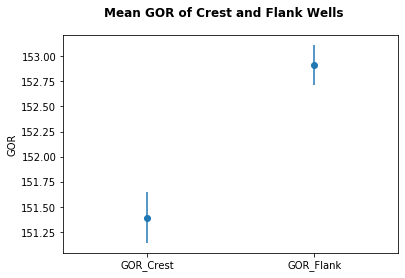

In [60]:
# Plot mean GOR of Crest and Flank Wells
fig, ax = plt.subplots()

fig.suptitle("Mean GOR of Crest and Flank Wells ",
             fontsize=12, fontweight="bold")

ax.errorbar(x_axis, means, yerr=sem, fmt="o")

ax.set_xlim(-0.5, 1.5)


ax.set_xticklabels(tick_labels)
ax.set_xticks([0, 1])

ax.set_ylabel("GOR")

plt.show()

In [61]:
# Run the t-test on Flank well and Crest Well - WOR
(t_stat, p) = stats.ttest_ind(WOR_Crest, WOR_Flank, equal_var=False)

In [62]:
# Report the data - Flank well and Crest Well - GOR
print("The mean WOR of Crest Wells is {}.".format(WOR_Crest.mean()))
print("The mean WOR of Flank Wells is is {}.".format(WOR_Flank.mean()))

print("p is {}.".format(p))
if p < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")

The mean WOR of Crest Wells is 6.067354293360548.
The mean WOR of Flank Wells is is 1.1478920637194943.
p is 0.0.
The difference in sample means is significant.


In [63]:
# Plot sample means with error bars
tick_labels = ["WOR_Crest", "WOR_Flank"]

means = [WOR_Crest.mean(), WOR_Flank.mean()]
x_axis = np.arange(0, len(means))

sem = [WOR_Crest.sem(), WOR_Flank.sem()]

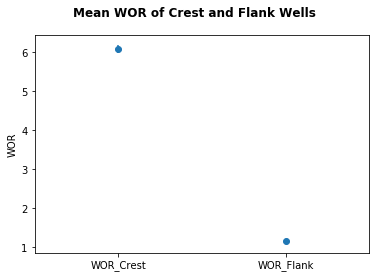

In [64]:
# Plot mean WOR of Crest and Flank Wells
fig, ax = plt.subplots()

fig.suptitle("Mean WOR of Crest and Flank Wells ",
             fontsize=12, fontweight="bold")

ax.errorbar(x_axis, means, yerr=sem, fmt="o")

ax.set_xlim(-0.5, 1.5)


ax.set_xticklabels(tick_labels)
ax.set_xticks([0, 1])

ax.set_ylabel("WOR")

plt.show()